In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')

In [3]:
pokemon.shape

(807, 14)

In [4]:
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


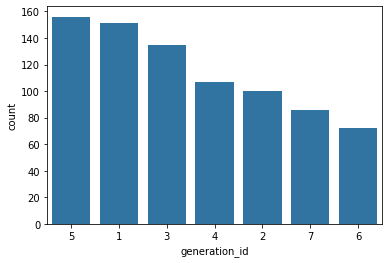

In [5]:
base_color = sb.color_palette()[0]
generation_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color=base_color, order=generation_order);

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

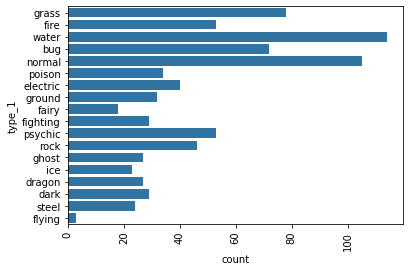

In [6]:
sb.countplot(data = pokemon, y = 'type_1', color=base_color);
plt.xticks(rotation=90)

In [7]:
pokemon_types = pokemon.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'],var_name='type_level', value_name='type').dropna()

In [8]:
pokemon_types[0:10]

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


In [9]:
type_counts = pokemon_types['type'].value_counts()
type_order = type_counts.index

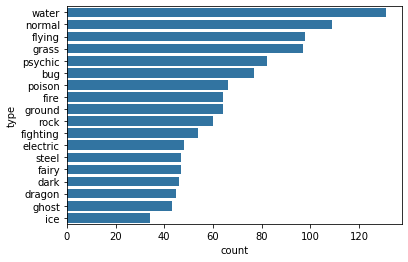

In [10]:
sb.countplot(data=pokemon_types, y = 'type', color=base_color, order=type_order);

In [11]:
n_pokemon = pokemon.shape[0]
max_type_counts = type_counts[0]
max_prop = max_type_counts / n_pokemon
max_prop

0.1623296158612144

In [12]:
tick_props = np.arange(0, max_prop,0.02)

In [13]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

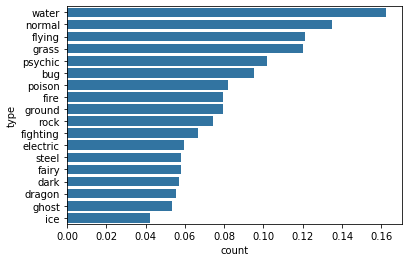

In [14]:
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')
sb.countplot(data=pokemon_types, y = 'type', color=base_color, order=type_order);

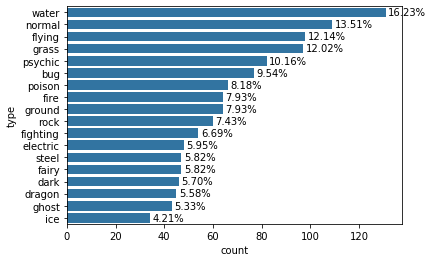

In [15]:
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    plt.text(count+1, i, '{:0.2f}%'.format(100*count/n_pokemon), va='center')

sb.countplot(data=pokemon_types, y = 'type', color=base_color, order=type_order);

Delta    17
Gamma     6
Beta      5
Aplha     1
Name: cat_var, dtype: int64

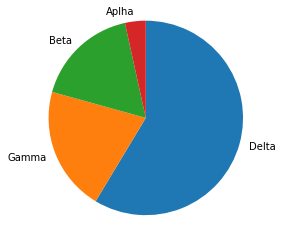

In [25]:
# code for the pie chart seen above
df = pd.read_csv('./data/cat_var.csv')
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

(-1.1236757716352959,
 1.1127887104687317,
 -1.1096718181857885,
 1.126792663918239)

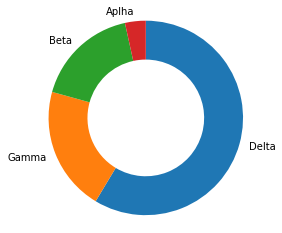

In [26]:
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')